# Machine Learning with Scikit-Learn

## scikuit-learn algorithm cheat-sheet
![scikuit-learn algorithm cheat-sheet](http://scikit-learn.org/dev/_static/ml_map.png)

## import the necessary libraries

In [46]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# init
sns.set()
%matplotlib inline

#### ignore warning: numpy.dtype size changed

In [14]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

#### upgrade all python packages

```python
!pip freeze --local | grep -v '^\-e' | cut -d = -f 1  | xargs -n1 pip install -U
```

## Machine learning algorithm

### 1. Linear Regression

#### Choose model type

In [23]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

#### Import data

In [24]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [55]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [45]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [39]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [58]:
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names
df['target'] = diabetes.target
df[:10]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


#### split data into training and test

In [25]:
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]

x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

#### Create model

In [27]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Predicted coefficients

In [28]:
linreg.coef_

array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01])

#### Prediction

In [29]:
linreg.predict(x_test)

array([ 197.61846908,  155.43979328,  172.88665147,  111.53537279,
        164.80054784,  131.06954875,  259.12237761,  100.47935157,
        117.0601052 ,  124.30503555,  218.36632793,   61.19831284,
        132.25046751,  120.3332925 ,   52.54458691,  194.03798088,
        102.57139702,  123.56604987,  211.0346317 ,   52.60335674])

In [30]:
y_test

array([ 233.,   91.,  111.,  152.,  120.,   67.,  310.,   94.,  183.,
         66.,  173.,   72.,   49.,   64.,   48.,  178.,  104.,  132.,
        220.,   57.])

#### The quality of the predictions

In [31]:
linreg.score(x_test, y_test)

0.58507530226905713

In [63]:
x0_train = x_train[:,0]
x0_test = x_test[:,0]

In [66]:
x0_train = x0_train[:,np.newaxis]
x0_test = x0_test[:,np.newaxis]

In [70]:
print(x_test[:,0])
print(x_test[:,1])

[-0.07816532  0.0090156   0.00175052 -0.07816532  0.03081083 -0.03457486
  0.04897352 -0.04183994 -0.00914709  0.07076875  0.0090156  -0.02730979
  0.01628068 -0.01277963 -0.05637009  0.04170844 -0.00551455  0.04170844
 -0.04547248 -0.04547248]
[ 0.05068012  0.05068012  0.05068012 -0.04464164  0.05068012  0.05068012
  0.05068012 -0.04464164 -0.04464164  0.05068012 -0.04464164 -0.04464164
 -0.04464164 -0.04464164 -0.04464164  0.05068012  0.05068012  0.05068012
 -0.04464164 -0.04464164]


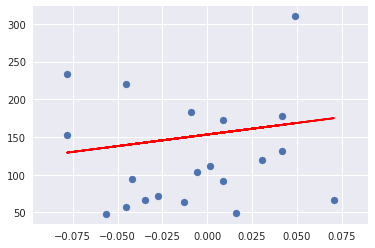

In [73]:
linreg = linear_model.LinearRegression()
linreg.fit(x0_train, y_train)

y = linreg.predict(x0_test)

plt.scatter(x0_test, y_test)

plt.plot(x0_test, y, color='r')